<a href="https://colab.research.google.com/github/davinnnnn/Natural-Language-Processing/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%87%BC%ED%95%91_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Colab에 Konlpy 라이브러리를 설치합니다.
!pip install konlpy

# Colab에 Mecab을 설치합니다.
!pip install mecab-python

# Mecab을 설치하기 위한 스크립트를 실행합니다.
# 이 스크립트는 konlpy 라이브러리의 공식 GitHub 저장소에서 가져와 실행합니다.
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)


mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [17]:
# 정규 표현식을 사용하기 위한 re 모듈을 import합니다.
import re

# 데이터 분석과 조작을 위한 pandas 라이브러리를 import합니다.
import pandas as pd

# 수학적 계산을 위한 numpy 라이브러리를 import합니다.
import numpy as np

# 데이터 시각화를 위한 matplotlib.pyplot 라이브러리를 import합니다.
import matplotlib.pyplot as plt

# 웹에서 데이터를 다운로드하기 위한 urllib.request 모듈을 import합니다.
import urllib.request

# 단어 빈도를 계산하기 위한 Counter 모듈을 import합니다.
from collections import Counter

# 한국어 형태소 분석을 위한 konlpy 라이브러리에서 Mecab 클래스를 import합니다.
from konlpy.tag import Mecab

# 데이터를 훈련 및 테스트 세트로 분할하기 위한 train_test_split 함수를 import합니다.
from sklearn.model_selection import train_test_split

# 텍스트 데이터를 숫자로 변환하기 위한 Tokenizer 클래스를 import합니다.
from tensorflow.keras.preprocessing.text import Tokenizer

# 시퀀스 데이터를 패딩(padding)하여 동일한 길이로 만들기 위한 pad_sequences 함수를 import합니다.
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [18]:
# urllib.request 모듈을 사용하여 주어진 URL에서 데이터를 다운로드하고 로컬 파일로 저장합니다.

# 다운로드할 파일의 URL을 지정합니다.
url = "https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt"

# 로컬에 저장될 파일의 이름을 "ratings_total.txt"로 지정합니다.
filename = "ratings_total.txt"

# urllib.request.urlretrieve() 함수를 사용하여 데이터를 다운로드하고 로컬 파일로 저장합니다.
urllib.request.urlretrieve(url, filename)


('ratings_total.txt', <http.client.HTTPMessage at 0x7ea9d625d900>)

In [19]:
# 'ratings_total.txt' 파일을 읽어서 데이터프레임으로 저장합니다.
# 데이터의 각 열은 'ratings'와 'reviews'라는 이름으로 지정합니다.
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

# 데이터프레임의 행 수를 len() 함수를 사용하여 계산하고, 전체 리뷰 개수를 출력합니다.
print('전체 리뷰 개수 :', len(total_data))


전체 리뷰 개수 : 200000


In [20]:
# 데이터프레임에서 처음 5개의 행을 선택하여 출력합니다.
# 이 작업은 데이터의 일부를 빠르게 확인하기 위해 사용됩니다.
total_data[:5]


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [21]:
# 새로운 'label' 열을 추가합니다.
# 'ratings' 열 값이 3보다 큰 경우에는 1을, 그렇지 않은 경우에는 0을 설정합니다.
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)

# 데이터프레임의 처음 5개 행을 다시 출력하여 결과를 확인합니다.
total_data[:5]


,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [22]:
# 'ratings' 열의 고유한 값 개수를 계산합니다.
unique_ratings_count = total_data['ratings'].nunique()

# 'reviews' 열의 고유한 값 개수를 계산합니다.
unique_reviews_count = total_data['reviews'].nunique()

# 'label' 열의 고유한 값 개수를 계산합니다.
unique_label_count = total_data['label'].nunique()

# 각 열의 고유한 값 개수를 출력합니다.
print('고유한 평가(ratings) 값 개수:', unique_ratings_count)
print('고유한 리뷰(reviews) 값 개수:', unique_reviews_count)
print('고유한 레이블(label) 값 개수:', unique_label_count)


고유한 평가(ratings) 값 개수: 4
고유한 리뷰(reviews) 값 개수: 199908
고유한 레이블(label) 값 개수: 2


In [23]:
# 'reviews' 열에서 중복된 내용을 제거하고 데이터프레임을 업데이트합니다.
total_data.drop_duplicates(subset=['reviews'], inplace=True)

# 중복이 제거된 후의 데이터프레임의 행 수를 len() 함수를 사용하여 계산하고 출력합니다.
print('총 샘플의 수:', len(total_data))


총 샘플의 수: 199908


In [24]:
# 데이터프레임에 결측치(null 값)가 있는지 여부를 확인합니다.
# .isnull() 메서드를 사용하여 각 셀이 결측치인지 확인하고,
# .values.any() 메서드를 사용하여 결측치가 하나라도 있는지 여부를 확인합니다.
print(total_data.isnull().values.any())


False


In [25]:
# train_test_split 함수를 사용하여 데이터를 훈련 데이터와 테스트 데이터로 나눕니다.
# total_data: 나눌 원본 데이터프레임
# test_size: 테스트 데이터의 비율을 설정 (0.25는 25%를 의미)
# random_state: 난수 시드를 설정하여 나눌 때의 무작위성을 제어
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=42)

# 훈련 데이터의 개수와 테스트 데이터의 개수를 출력합니다.
print('훈련용 리뷰의 개수:', len(train_data))
print('테스트용 리뷰의 개수:', len(test_data))


훈련용 리뷰의 개수: 149931
테스트용 리뷰의 개수: 49977


<Axes: >

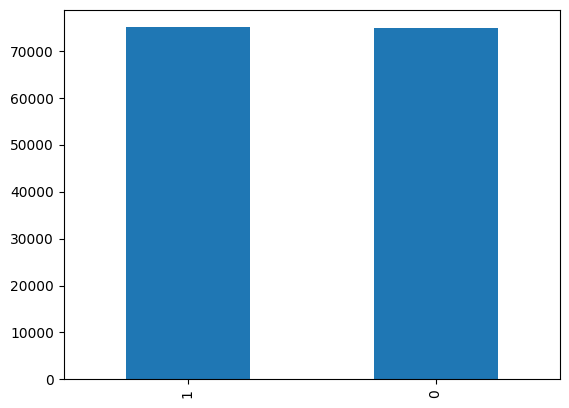

In [26]:
# 'label' 열의 값 분포를 시각화합니다.
# value_counts() 함수를 사용하여 각 레이블의 개수를 계산하고,
# plot(kind='bar') 메서드를 사용하여 막대 그래프로 표시합니다.
train_data['label'].value_counts().plot(kind='bar')


In [27]:
# 'label' 열의 값에 따라 그룹화하고, 각 그룹의 샘플 개수를 계산합니다.
# reset_index(name='count')를 사용하여 결과를 데이터프레임으로 표시하고, 'count' 열로 이름을 설정합니다.
grouped_data = train_data.groupby('label').size().reset_index(name='count')

# 결과를 출력합니다.
print(grouped_data)


   label  count
0      0  74918
1      1  75013


In [28]:
# 'reviews' 열에서 한글과 공백을 제외한 모든 문자를 제거합니다.
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 빈 문자열을 결측치(np.nan)로 대체합니다.
train_data['reviews'].replace('', np.nan, inplace=True)

# 결측치의 개수를 출력합니다.
print(train_data.isnull().sum())


<ipython-input-28-b69820e24506>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


ratings    0
reviews    0
label      0
dtype: int64


In [29]:
# 중복된 리뷰 텍스트를 제거합니다.
test_data.drop_duplicates(subset=['reviews'], inplace=True)

# 'reviews' 열에서 한글과 공백을 제외한 모든 문자를 제거합니다.
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 공백 문자열을 결측치(np.nan)로 대체합니다.
test_data['reviews'].replace('', np.nan, inplace=True)

# 결측치(null 값)가 있는 행을 제거합니다.
test_data = test_data.dropna(how='any')

# 전처리 후 테스트 데이터의 개수를 출력합니다.
print('전처리 후 테스트용 샘플의 개수:', len(test_data))


<ipython-input-29-c88ccc26423d>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


전처리 후 테스트용 샘플의 개수: 49977
